### Target:
    
    - Use GAP as last layer.

### Results:

    - Model has 4.5k parameters.

    - Train Accuracy = 98.42

    - Test Accuracy = 98.77

### Analysis:

    - Still no sign of overfitting.

    - We have room to add more parameters.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model6 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model6                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 8, 28, 28]           --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 4, 28, 28]           36                          0.80%
│    └─Dropout: 2-2                      [64, 4, 28, 28]           [64, 4, 28, 28]           --                             --
│    └─ReLU: 2-3                         [64, 4, 28, 28]           [64, 4, 28, 28]           --                             --
│    └─BatchNorm2d: 2-4                  [64, 4, 28, 28]           [64, 4, 28, 28]           8                           0.18%
│    └─Conv2d: 2-5                       [64, 4, 28, 28]           [64, 8, 28, 28]           288               

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.1647 Batch_id=937 Average Loss=0.4961 Accuracy=85.69: 100%|██████████| 938/938 [00:25<00:00, 36.41it/s]


Test set: Average loss: 0.2500, Accuracy: 9247/10000 (92.47%)

Epoch 2


Train: Batch Loss=0.1345 Batch_id=937 Average Loss=0.1360 Accuracy=95.89: 100%|██████████| 938/938 [00:24<00:00, 38.54it/s]


Test set: Average loss: 0.1475, Accuracy: 9563/10000 (95.63%)

Epoch 3


Train: Batch Loss=0.0919 Batch_id=937 Average Loss=0.1043 Accuracy=96.80: 100%|██████████| 938/938 [00:25<00:00, 36.63it/s]


Test set: Average loss: 0.0843, Accuracy: 9732/10000 (97.32%)

Epoch 4


Train: Batch Loss=0.0551 Batch_id=937 Average Loss=0.0897 Accuracy=97.22: 100%|██████████| 938/938 [00:26<00:00, 35.40it/s]


Test set: Average loss: 0.0736, Accuracy: 9769/10000 (97.69%)

Epoch 5


Train: Batch Loss=0.0653 Batch_id=937 Average Loss=0.0813 Accuracy=97.50: 100%|██████████| 938/938 [00:26<00:00, 35.88it/s]


Test set: Average loss: 0.0800, Accuracy: 9749/10000 (97.49%)

Epoch 6


Train: Batch Loss=0.0842 Batch_id=937 Average Loss=0.0729 Accuracy=97.78: 100%|██████████| 938/938 [00:29<00:00, 31.62it/s]


Test set: Average loss: 0.0672, Accuracy: 9793/10000 (97.93%)

Epoch 7


Train: Batch Loss=0.0327 Batch_id=937 Average Loss=0.0679 Accuracy=97.94: 100%|██████████| 938/938 [00:29<00:00, 31.69it/s]


Test set: Average loss: 0.0681, Accuracy: 9774/10000 (97.74%)

Epoch 8


Train: Batch Loss=0.1610 Batch_id=937 Average Loss=0.0662 Accuracy=97.93: 100%|██████████| 938/938 [00:30<00:00, 30.84it/s]


Test set: Average loss: 0.0642, Accuracy: 9814/10000 (98.14%)

Epoch 9


Train: Batch Loss=0.0424 Batch_id=937 Average Loss=0.0619 Accuracy=98.03: 100%|██████████| 938/938 [00:30<00:00, 31.14it/s]


Test set: Average loss: 0.0570, Accuracy: 9828/10000 (98.28%)

Epoch 10


Train: Batch Loss=0.0440 Batch_id=937 Average Loss=0.0602 Accuracy=98.08: 100%|██████████| 938/938 [00:30<00:00, 31.04it/s]


Test set: Average loss: 0.0548, Accuracy: 9835/10000 (98.35%)

Epoch 11


Train: Batch Loss=0.0596 Batch_id=937 Average Loss=0.0576 Accuracy=98.18: 100%|██████████| 938/938 [00:29<00:00, 31.86it/s]


Test set: Average loss: 0.0454, Accuracy: 9859/10000 (98.59%)

Epoch 12


Train: Batch Loss=0.0274 Batch_id=937 Average Loss=0.0557 Accuracy=98.28: 100%|██████████| 938/938 [00:28<00:00, 32.44it/s]


Test set: Average loss: 0.0513, Accuracy: 9843/10000 (98.43%)

Epoch 13


Train: Batch Loss=0.0044 Batch_id=937 Average Loss=0.0547 Accuracy=98.27: 100%|██████████| 938/938 [00:28<00:00, 32.65it/s]


Test set: Average loss: 0.0458, Accuracy: 9860/10000 (98.60%)

Epoch 14


Train: Batch Loss=0.0736 Batch_id=937 Average Loss=0.0506 Accuracy=98.43: 100%|██████████| 938/938 [00:28<00:00, 32.44it/s]


Test set: Average loss: 0.0400, Accuracy: 9876/10000 (98.76%)

Epoch 15


Train: Batch Loss=0.0607 Batch_id=937 Average Loss=0.0510 Accuracy=98.39: 100%|██████████| 938/938 [00:29<00:00, 31.97it/s]


Test set: Average loss: 0.0392, Accuracy: 9877/10000 (98.77%)



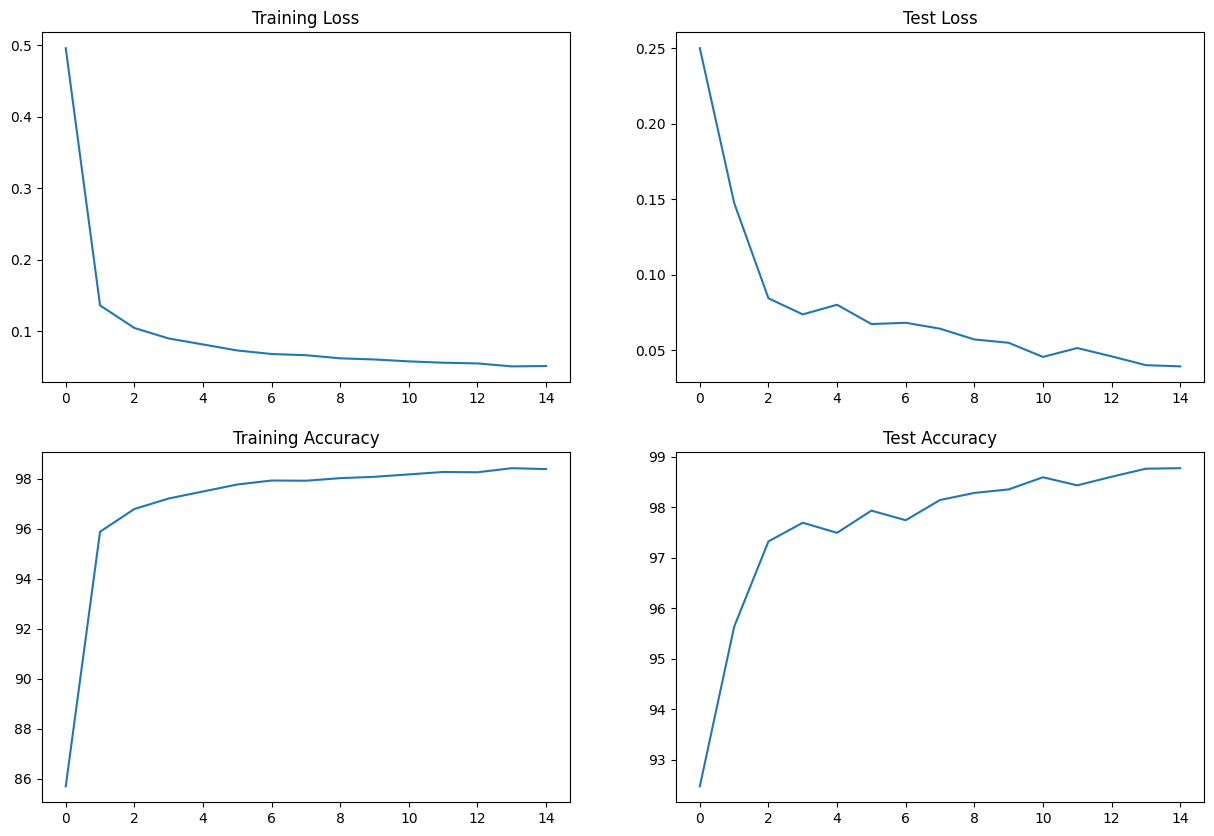

In [10]:
from utils import plot_stats
plot_stats()

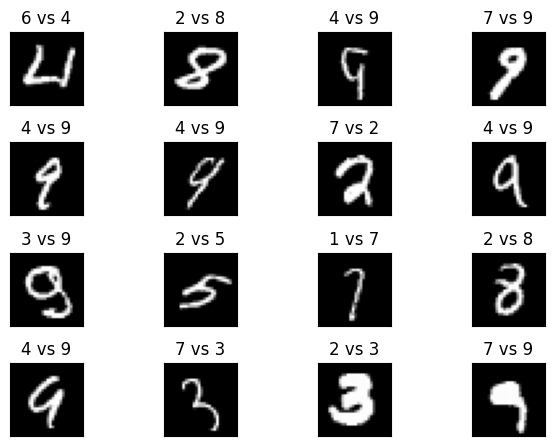

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual